<a href="https://colab.research.google.com/github/Meetsud/DescriptiveInferentialStatisticsMiniProject/blob/main/TimeSeries_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Importing the data
df = pd.read_csv('multiTimeline.csv')
df. head ()

,Month,Diet,Gym,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [27]:
# Getting an idea about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    168 non-null    object
 1   Diet     168 non-null    int64 
 2   Gym      168 non-null    int64 
 3   Finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [28]:
# Converting month to datetime
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


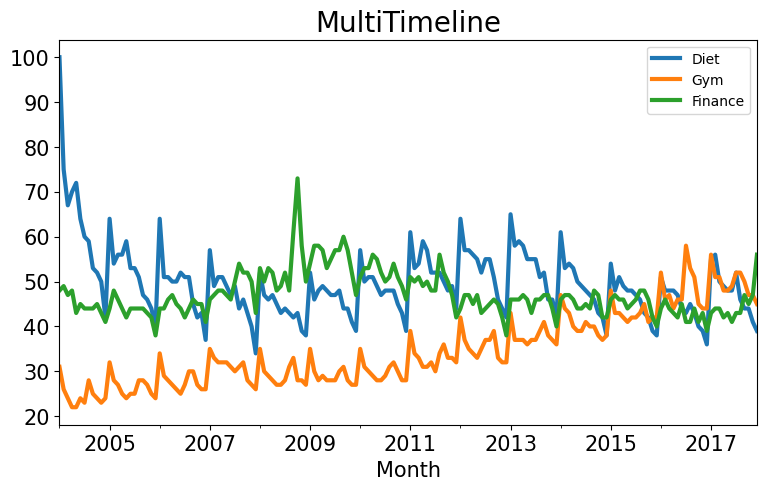

In [29]:
# Plot
df.plot(figsize = (9, 5), linewidth = 3, fontsize = 15)
plt.title( 'MultiTimeline', fontsize = 20)
plt.xlabel( 'Month', fontsize = 15)
plt.show()

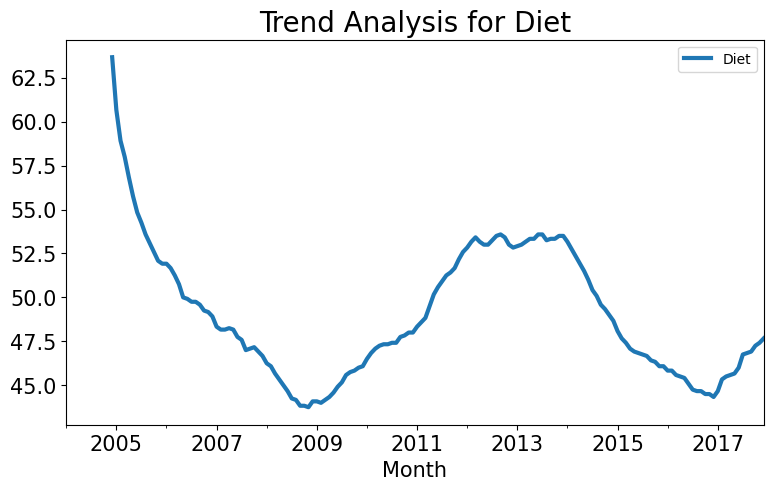

In [30]:
# Check for trend
diet = df[[ 'Diet']]
diet.rolling(12).mean().plot(figsize = (9, 5), linewidth = 3, fontsize = 15)
plt. title( 'Trend Analysis for Diet', fontsize = 20)
plt. xlabel ('Month', fontsize = 15)
plt.show()

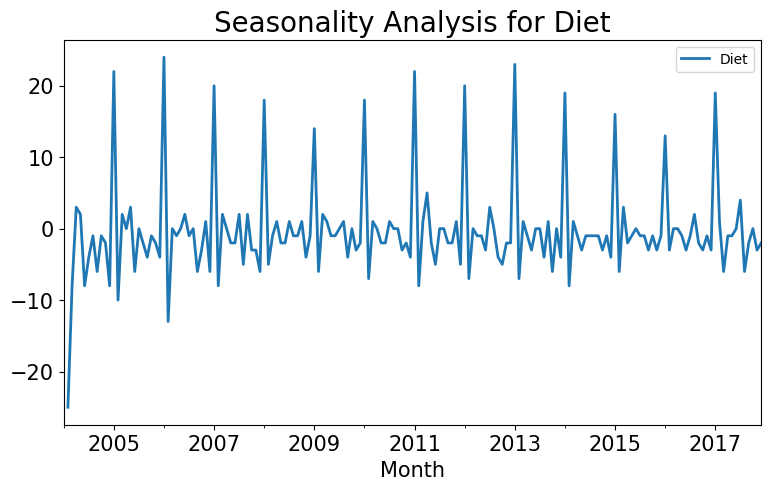

In [33]:
# Check for Seasonality
diet.diff().plot(figsize =(9, 5), linewidth = 2, fontsize = 15)
plt.title('Seasonality Analysis for Diet', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.show()

In [37]:
'''
 Y (Predicted Value) = levels + trends + seasonality + noise
'''

'\n Y (Predicted Value) = levels + trends + seasonality + noise\n'

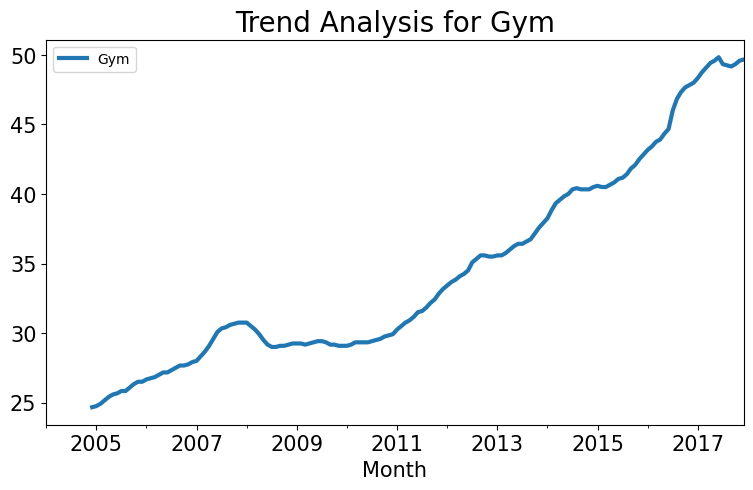

In [36]:
# Check for trend
gym = df[[ 'Gym']]
gym.rolling(12).mean().plot(figsize = (9, 5), linewidth = 3, fontsize = 15)
plt.title('Trend Analysis for Gym', fontsize = 20)
plt.xlabel ( 'Month', fontsize = 15)
plt.show()

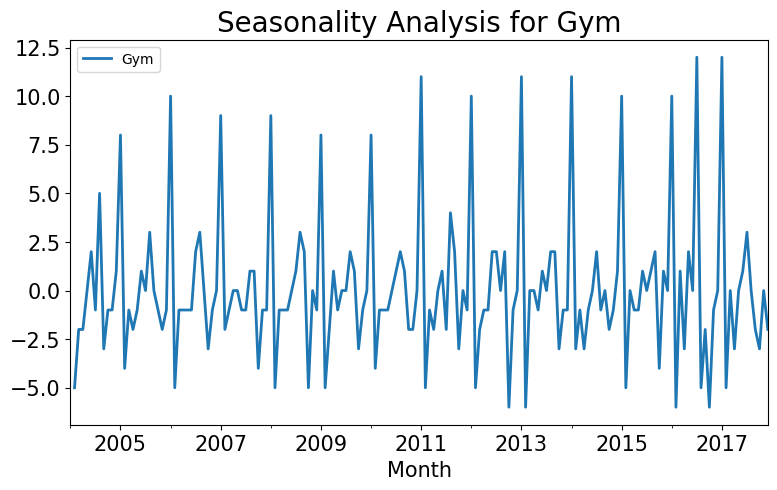

In [38]:
# Check for Seasonality
gym.diff().plot(figsize =(9, 5), linewidth = 2, fontsize = 15)
plt. title('Seasonality Analysis for Gym', fontsize = 20)
plt. xlabel( 'Month', fontsize = 15)
plt.show()

In [39]:
# ARIMA for diet prediction
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diet, order = (1, 1, 1))
model_fit = model.fit()
print (model_fit.summary ())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Diet   No. Observations:                  168
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -537.817
Date:                Sat, 05 Jul 2025   AIC                           1081.634
Time:                        08:57:27   BIC                           1090.988
Sample:                    01-01-2004   HQIC                          1085.431
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2604      0.153      1.705      0.088      -0.039       0.560
ma.L1         -0.7273      0.089     -8.161      0.000      -0.902      -0.553
sigma2        36.6219      3.164     11.575      0.0

In [40]:
'''
ACF and PACF ->
ACF -> Autocorrelation Function
PACF -> Partial Autocorrelation Function
Since the correlations of time series observation is calculated with values of the same series at different time lags, this is called as autocorrelation
A plot of autocorrelation of a dataset of a time series by lag is called as AutoCorrelation Function
'''

'\nACF and PACF ->\nACF -> Autocorrelation Function\nPACF -> Partial Autocorrelation Function\nSince the correlations of time series observation is calculated with values of the same series at different time lags, this is called as autocorrelation\nA plot of autocorrelation of a dataset of a time series by lag is called as AutoCorrelation Function\n'

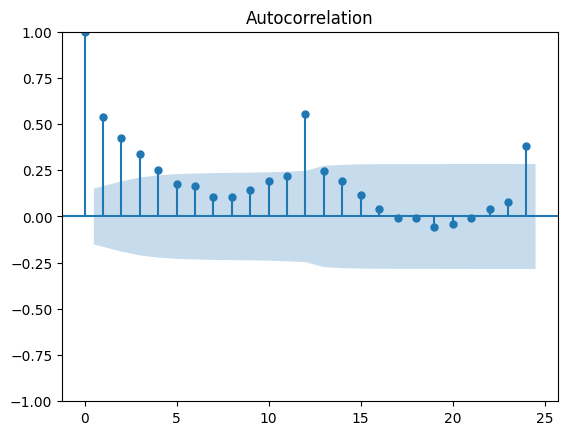

In [41]:
# ACF Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diet, lags = 24)
plt. show()

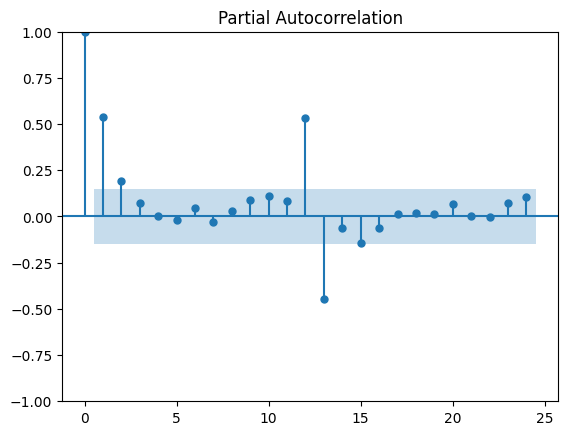

In [42]:
# After 12 months, there seems to be a peak for correlation.
# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diet, lags = 24)
plt.show()